<a href="https://colab.research.google.com/github/gladysbabs/Time-Series/blob/main/Project_3_(Core)_Part1%262_Gladys_Babirye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part1-Loading the Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CodingDojo/02-IntroML/Week08/Data/Crimes_-_2001_to_Present.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915115 entries, 0 to 915114
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    915115 non-null  int64  
 1   Case Number           915115 non-null  object 
 2   Date                  915115 non-null  object 
 3   Block                 915115 non-null  object 
 4   IUCR                  915115 non-null  object 
 5   Primary Type          915115 non-null  object 
 6   Description           915115 non-null  object 
 7   Location Description  909986 non-null  object 
 8   Arrest                915115 non-null  bool   
 9   Domestic              915115 non-null  bool   
 10  Beat                  915115 non-null  int64  
 11  District              915114 non-null  float64
 12  Ward                  914854 non-null  float64
 13  Community Area        914857 non-null  float64
 14  FBI Code              915115 non-null  object 
 15  

## Holidays

In [ ]:
import holidays
import datetime as dt
from holidays import country_holidays

In [ ]:
## making a date range that covers full dataset
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days

DatetimeIndex(['2001-01-01 14:00:00', '2001-01-02 14:00:00',
               '2001-01-03 14:00:00', '2001-01-04 14:00:00',
               '2001-01-05 14:00:00', '2001-01-06 14:00:00',
               '2001-01-07 14:00:00', '2001-01-08 14:00:00',
               '2001-01-09 14:00:00', '2001-01-10 14:00:00',
               ...
               '2023-12-21 14:00:00', '2023-12-22 14:00:00',
               '2023-12-23 14:00:00', '2023-12-24 14:00:00',
               '2023-12-25 14:00:00', '2023-12-26 14:00:00',
               '2023-12-27 14:00:00', '2023-12-28 14:00:00',
               '2023-12-29 14:00:00', '2023-12-30 14:00:00'],
              dtype='datetime64[ns]', length=8399, freq='D')

In [ ]:
#converting the date column to datetime:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915115 entries, 0 to 915114
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    915115 non-null  int64         
 1   Case Number           915115 non-null  object        
 2   Date                  915115 non-null  datetime64[ns]
 3   Block                 915115 non-null  object        
 4   IUCR                  915115 non-null  object        
 5   Primary Type          915115 non-null  object        
 6   Description           915115 non-null  object        
 7   Location Description  909986 non-null  object        
 8   Arrest                915115 non-null  bool          
 9   Domestic              915115 non-null  bool          
 10  Beat                  915115 non-null  int64         
 11  District              915114 non-null  float64       
 12  Ward                  914854 non-null  float64       
 13 

In [ ]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')

## Getting US holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]

# For a specific subdivisions (e.g. state or province):
md_holidays = country_holidays('US', subdiv='MD')

## Saving both holiday types as columns in the original
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df['MD Holiday'] = [md_holidays.get(day) for day in df['Date']]
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,US Holiday,MD Holiday
0,11037294,JA371270,2015-03-18 12:00:00,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN,None,None
1,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
2,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
3,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
4,11645601,JC212935,2014-06-01 00:01:00,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None


### 2 forms of the data:

In [ ]:
#The original individual crime data with a datetime index. (Each row is 1 crime)
df_dt = df.set_index("Date")
df_dt.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,US Holiday,MD Holiday
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN,None,None
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None


In [ ]:
#A resampled/converted crime counts version (Each row is 1 day)
df_Daily_rs=df_dt.resample("D").sum()
df_Daily_rs.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,US Holiday,MD Holiday
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,213499956,HL717150JG467702JH183931JF211964HL648777HL8026...,056XX S WOLCOTT AVE045XX N CENTRAL PARK AVE032...,0840028117530281084011201753084008401754026608...,THEFTCRIMINAL SEXUAL ASSAULTOFFENSE INVOLVING ...,FINANCIAL ID THEFT: OVER $300NON-AGGRAVATEDSEX...,APARTMENTRESIDENCEAPARTMENTRESIDENCERESIDENCEB...,3,9,34287,...,0602020206100206060202060602170611060606170206...,17401429.0,28292439.0,54027.0,03/31/2006 10:03:38 PM10/21/2023 03:42:03 PM03...,627.649808,-1315.320534,"(41.790485769, -87.671628682)(41.664387922, -8...",New Year's DayNew Year's DayNew Year's DayNew ...,New Year's DayNew Year's DayNew Year's DayNew ...
2001-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0,0.000000,0.000000,0,0,0
2001-01-03,4522762,HM109864,021XX N MULLIGAN AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,0,0,2512,...,06,1133767.0,1913726.0,2001.0,03/31/2006 10:03:38 PM,41.919476,-87.783953,"(41.919476449, -87.783952789)",0,0
2001-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0,0.000000,0.000000,0,0,0
2001-01-05,8865046,HL640440HM107916,021XX S MICHIGAN AVE026XX N WASHTENAW AVE,11200840,DECEPTIVE PRACTICETHEFT,FORGERYFINANCIAL ID THEFT: OVER $300,CREDIT UNIONRESIDENCE,0,0,1545,...,1006,2335528.0,3807818.0,4002.0,03/31/2006 10:03:38 PM03/31/2006 10:03:38 PM,83.783734,-175.318694,"(41.85414395, -87.623702902)(41.929589854, -87...",0,0


# Task

## Topic 1) Comparing Police Districts

In [ ]:
#Filter the DataFrame for crimes in 2022
df_2022 = df_dt.loc['2022']

- Which district had the most crimes in 2022?

In [ ]:
district_crime_counts = df_2022.groupby('District').size()

# Find the district with the highest aggregated count
district_most_crime = district_crime_counts.idxmax()
most_crime_count = district_crime_counts.max()

# Print the result
print(f"The district with the most aggregated crimes in 2022 is District {district_most_crime} "
      f"with {most_crime_count} occurrences.")


The district with the most aggregated crimes in 2022 is District 8.0 with 14243 occurrences.


- Which district had the least crimes in 2022?

In [ ]:
# Find the district with the least count
district_least_crime = district_crime_counts.idxmin()
least_crime_count = district_crime_counts.min()

# Print the result
print(f"The district with the least crimes in 2022 is District {district_least_crime} "
      f"with {least_crime_count} occurrences.")

The district with the least crimes in 2022 is District 31.0 with 15 occurrences.


## Topic 2) Crimes Across the Years:

In [ ]:
## Engineering Features using components of the date/time
df_dt['Year']  = df_dt.index.year

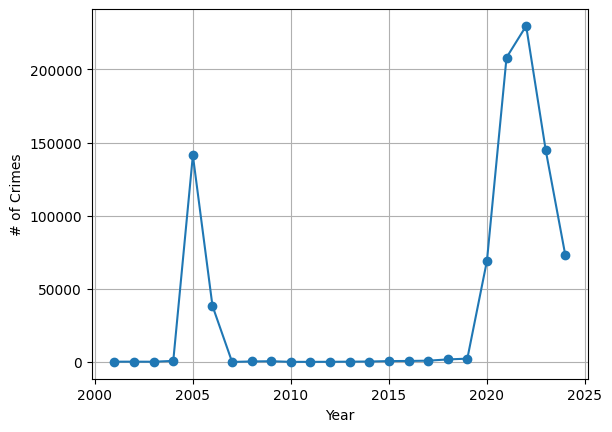

In [ ]:
## save year counts
year_counts = df_dt['Year'].value_counts().sort_index()
#The plot
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

- Is the total number of crimes increasing or decreasing across the years?
    - Basing on the graph above it looks like crime rate has predominantly assumed a declining rate over periods between 2000-2004, 2006-2019 and 2023. Ofcourse with afew occassional spikes in 2005 and a growth between 2020-2022.

- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

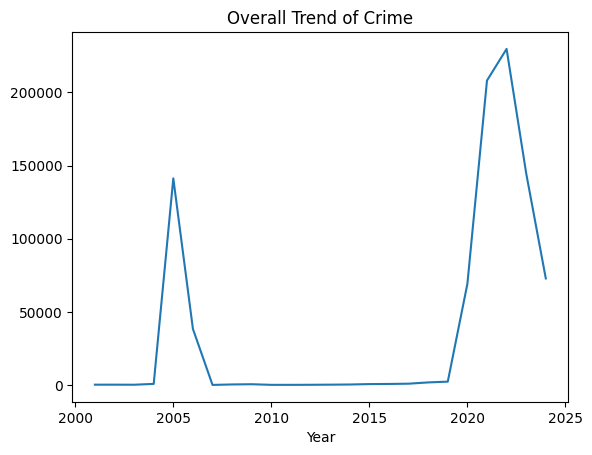

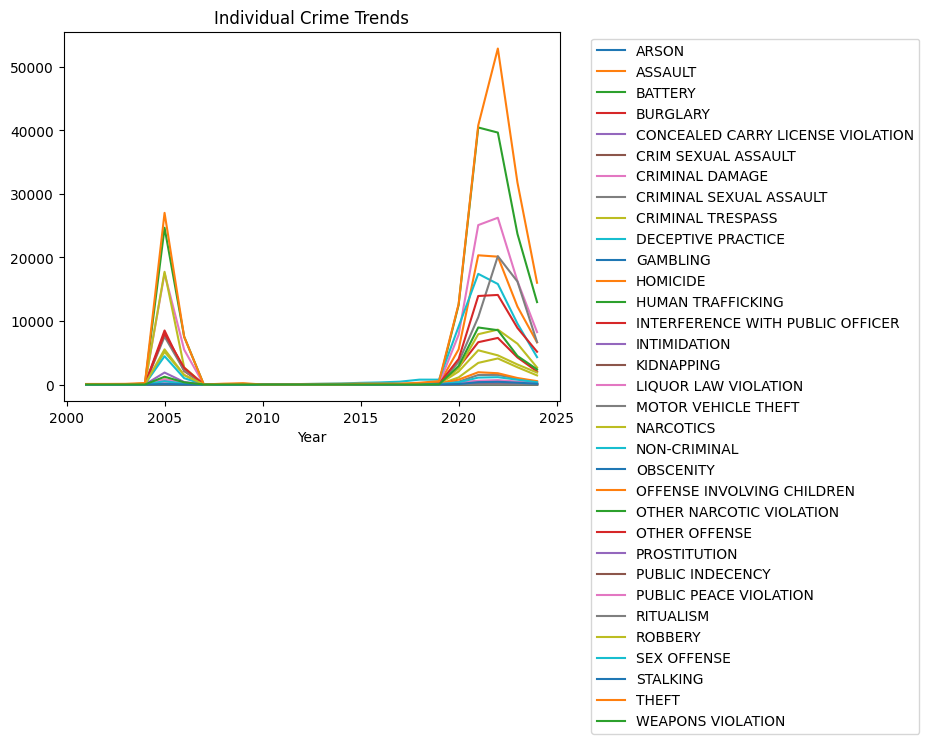

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the crime data

# Calculate overall trend of crime (e.g., total number of crimes per year)
total_crime_trend = df_dt.groupby('Year').size()

# Calculate individual crime trends (e.g., number of occurrences for each crime type per year)
distinct_crime_trends = df.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# Plot overall trend of crime
total_crime_trend.plot(kind='line', title='Overall Trend of Crime')

# Plot individual crime trends
ax = distinct_crime_trends.plot(kind='line', title='Individual Crime Trends')

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plots
plt.show()


- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
   - From the visualization above, there're no individual crimes that are decreasing while the overall crime is increasing or vice-versa.

## Topic 4) Comparing Months:

In [ ]:
## Extracting the Month
df_dt['Month'] = df_dt.index.month
df_dt['MonthName'] = df_dt.index.month_name()

In [ ]:
# saving lookup for number vs name
unique_months = df_dt.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

<ipython-input-21-09fc547bb386>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_dt, x='MonthName',palette='dark',order=month_lookup.values());
<ipython-input-21-09fc547bb386>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


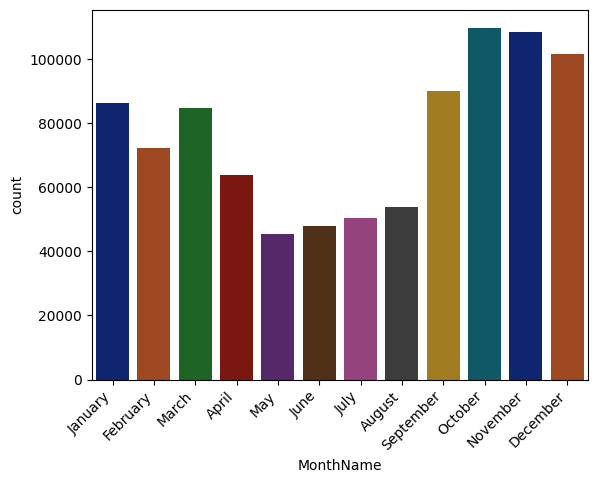

In [ ]:
import seaborn as sns

#The plot
ax = sns.countplot(data=df_dt, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

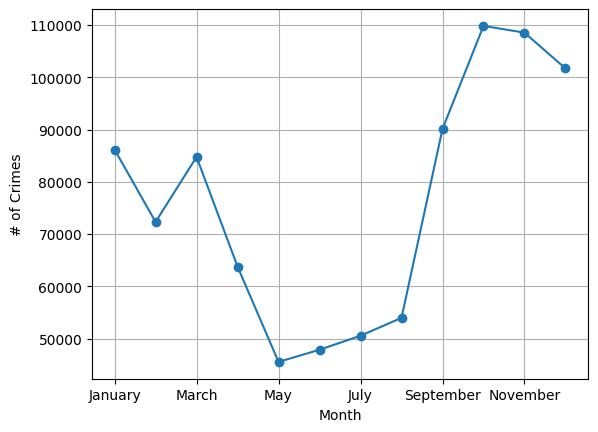

In [ ]:
##  month counts
month_counts = df_dt['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');


- ​What months have the most crime?
    - When we look at the visualization above, the most crime is in the months between September-December, with the peak crime observed in the month of October.
- What months have the least?
    - When we look at the visualization above, the months with the least crime are between May - August, with the significant drop observed in the month of May.
- Are there any individual crimes that do not follow this pattern? If so, which crimes?
   - Basing on the above visualization, you can't easily answer this question since the crimes have been aggregated monthly. It's worth exploring using a seasonality approach for each individual crime.

### Seasonality

In [ ]:
# Create a pivot table with 'Primary Type' values as columns and counts as values
crimes = pd.pivot_table(df_dt, index=df_dt.index, columns='Primary Type', aggfunc='size',fill_value=0)

In [ ]:
crimes_ts = crimes.copy()
crimes_ts

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,0,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,3,0
2001-01-01 00:01:00,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,3,0
2001-01-01 08:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2001-01-01 08:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2001-01-01 09:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-21 23:47:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2024-04-21 23:54:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-04-21 23:55:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- I see two colmuns 'CRIM SEXUAL ASSAULT' & 'CRIMINAL SEXUAL ASSAULT' which seem to be the same crime. I will addressing this by mergining data from 'CRIM SEXUAL ASSAULT' to 'CRIMINAL SEXUAL ASSAULT' as seen below:

In [ ]:
crimes_ts.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION',
       'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY',
       'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

In [ ]:
# Assuming df is your DataFrame containing the two columns 'crim sexual assault' and 'Crime sexual assault'

# Merge the data from both columns into the 'Crime sexual assault' column
crimes_ts['CRIMINAL SEXUAL ASSAULT'] = crimes_ts['CRIMINAL SEXUAL ASSAULT'].combine_first(crimes_ts['CRIM SEXUAL ASSAULT'])

# Drop the 'crim sexual assault' column
crimes_ts.drop(columns=['CRIM SEXUAL ASSAULT'],inplace=True)


In [ ]:
crimes_ts.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,0,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,3,0
2001-01-01 00:01:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,0
2001-01-01 08:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2001-01-01 08:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2001-01-01 09:00:00,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0


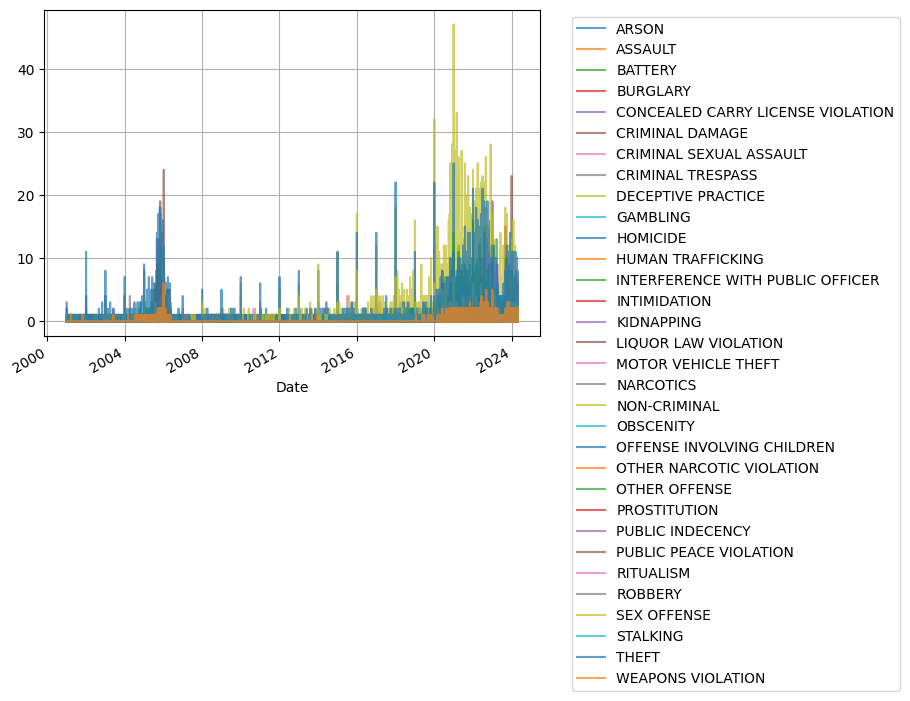

In [ ]:
ax= crimes_ts.plot(grid=True,alpha=0.7)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1));

- With this visualization I can't descipher much. Let's try plotting the crimes with a larger frequency, maybe weekly.

### Weekly resampling.

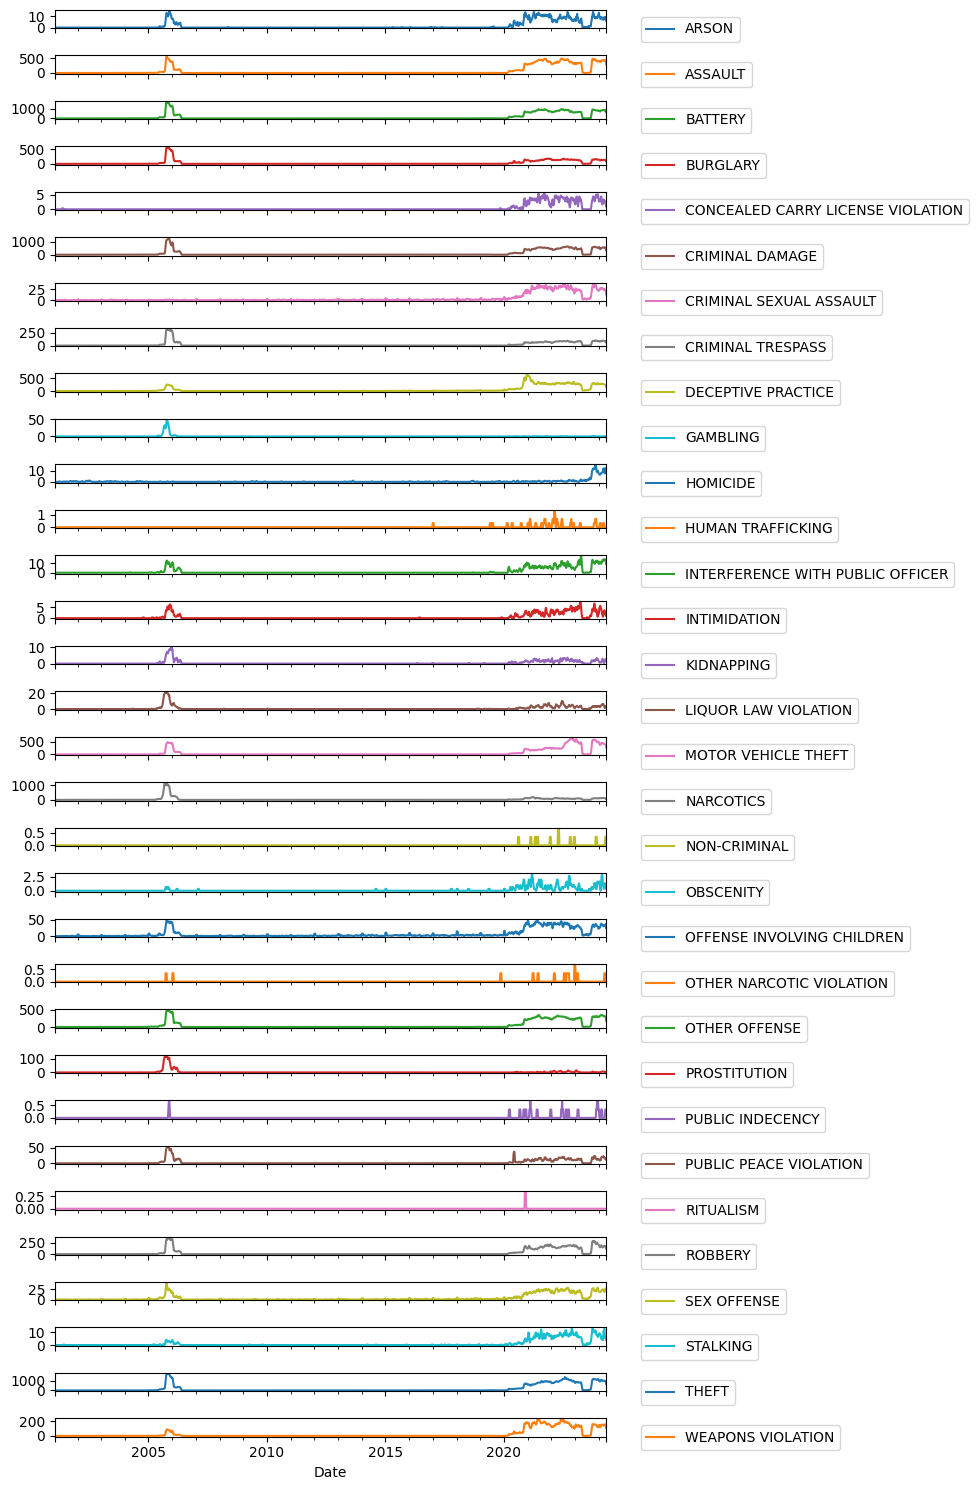

In [ ]:
#Resampling with a larger frequency (Weekly)
crimes_W = crimes_ts.resample('W').sum()

#Plotting with a rolling mean with a window of 3 weeks
ax= crimes_W.rolling(3).mean().dropna().plot(subplots=True,figsize=(10,15))

# Add legend to each subplot
for subplot in ax:
    subplot.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


- To answer the question again: Are there any individual crimes that do not follow this pattern? If so, which crimes?
  - Yes there are individual crimes that do not follow the overall pattern. These are: CONCEALED CARRY LICENSE VIOLATION,  CRIMINAL SEXUAL ASSAULT,  GAMBLING,  HOMICIDE,  HUMAN TRAFFICKING,  NON-CRIMINAL,  PROSTITUTION,  and RITUALISM.

# Project 3 - Part 2 (Core)

### Custom Functions

In [ ]:
#Function to test stationarity

# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])


In [ ]:
#custom function for ACF/PACF:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)

    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()

    return fig

In [ ]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics


In [ ]:
def get_sig_lags(ts, type='ACF', nlags=None,alpha=0.5):


    if type == 'ACF':
        # Running the function used by plot_acf
        corr_values, conf_int = tsa.stattools.acf(ts, alpha=alpha, nlags=nlags)

    elif type=='PACF':
        corr_values, conf_int = tsa.stattools.pacf(ts, alpha=alpha, nlags=nlags)

    else:
        raise Exception("type must be either 'ACF' or 'PACF'")

    # Determine lags
    lags =range(len(corr_values))

    # Create a centered version of the acf_df
    corr_df = pd.DataFrame({type:corr_values,
                            'Lags':lags,
                            'lower ci': conf_int[:,0]-corr_values, # subtract acf from lower ci to center
                            'upper ci': conf_int[:,1]-corr_values, # subtact acf to upper ci to center
                                 })
    corr_df = corr_df.set_index("Lags")

    # Getting filter for sig lags
    filter_sig_lags = (corr_df[type] < corr_df['lower ci']) | (corr_df[type] > corr_df['upper ci'])

    # Get lag #'s
    sig_lags= corr_df.index[filter_sig_lags]
    sig_lags = sig_lags[sig_lags!=0]

    return sig_lags

## Transforming Data_Theft

In [ ]:
#Filtering only 2 crimes: Theft and battery
ts_theft = df_dt[(df_dt['Primary Type'] == 'THEFT')]

In [ ]:
#Transform the data to obtain a time series of the crime count per month using .size().
ts_theft=ts_theft.resample('M').size()

In [ ]:
ts_theft

Date
2001-01-31      25
2001-02-28       5
2001-03-31      10
2001-04-30       2
2001-05-31       3
              ... 
2023-12-31    5036
2024-01-31    4344
2024-02-29    4310
2024-03-31    4403
2024-04-30    2961
Freq: M, Length: 280, dtype: int64

In [ ]:
ts_theft.index

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=280, freq='M')

In [ ]:
#Checking for null values
ts_theft.isna().sum()

0

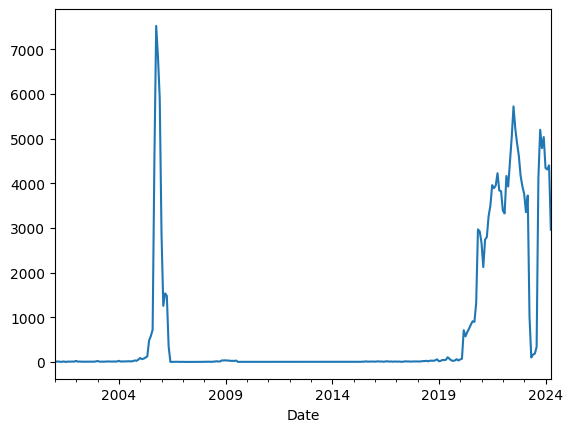

In [ ]:
# Visualize the time series
ts_theft.plot();

- I can't really see any seasonality in this time series. Let's decompose the time series then.

In [ ]:
pip install pmdarima

In [ ]:
#The imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs

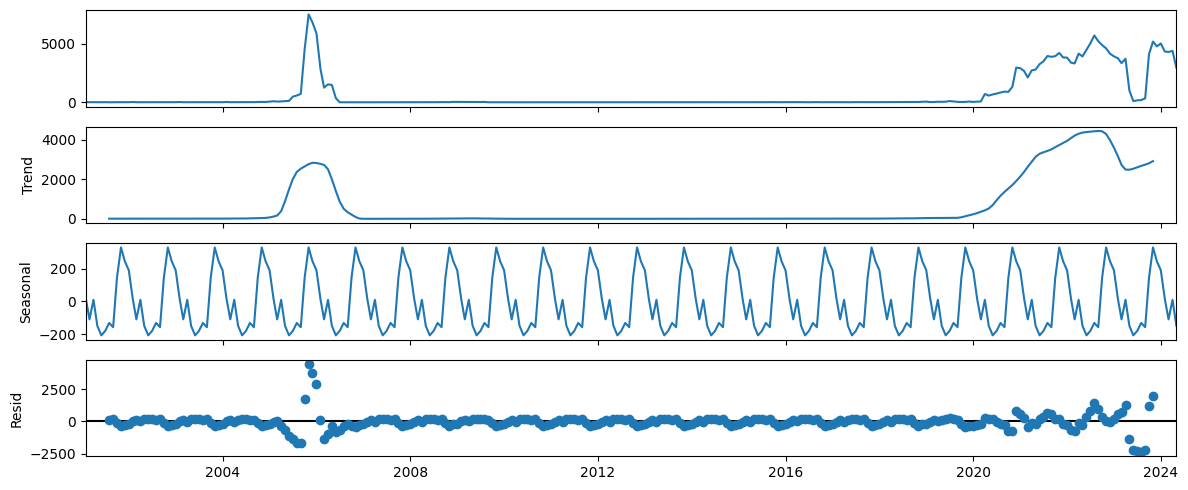

In [ ]:
#Decompose the Time series to detect seasonality
decomp = tsa.seasonal_decompose(ts_theft)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

- In the seasonal plot, we can see seasonality.

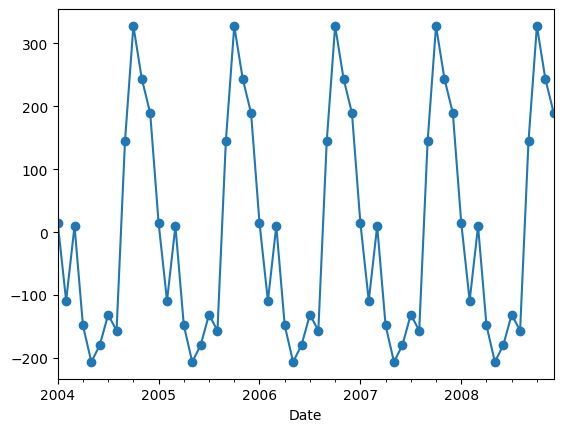

In [ ]:
# Narrow down the date range of the plot
seasonal = decomp.seasonal
ax = seasonal.loc['2004': '2008'].plot(marker = 'o')

In [ ]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts_theft.max()-ts_theft.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 534.0872859025034 which is ~7.10% of the variation in time series.


### Differencing/Stationarity/ACF_PACF Plots

In [ ]:
#Determine if nonseasonal and/or seasonal differencing is required
# check for nonseasonal differencing
ndiffs(ts_theft)

1

In [ ]:
# Checking for seasonal differencing
#Since it's monthly data, each season has m=12.
nsdiffs(ts_theft, m = 12)

0

In [ ]:
#Checking the Timeseries for stationarity
get_adfuller_results(ts_theft)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-2.011143,7,272,0.281709,0.05,False


- This time series isn't stationary, therefore we shall apply differencing once inorder to make it stationary.

In [ ]:
ts_theft=ts_theft.diff().dropna()

In [ ]:
#Checking the Timeseries for stationarity again
get_adfuller_results(ts_theft)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-8.736141,6,272,0.0,0.05,True


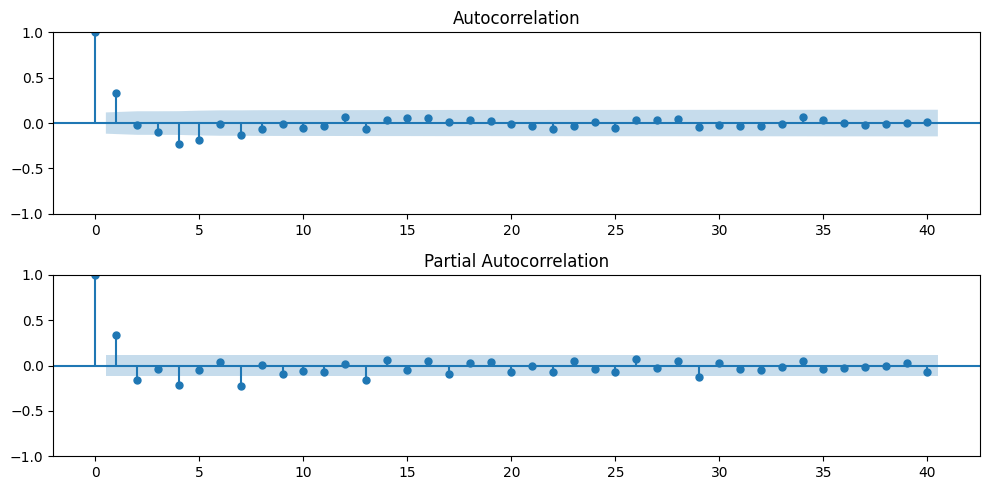

In [ ]:
# Using the plot_acf_pacf function:
plot_acf_pacf(ts_theft);

- The acf_plot showcases that the ACF graph has a gradual decrease after the 1st lag hence p=1, the PACF also shows a drastic drop after the 2nd lag,q=2.
- ACF shows 4 significant peaks at seasonal lags. Let's use the seasonal order Q=4.
- PACF shows 4 significant peaks at seasonal lags. Let's use the seasonal order P=4.

### Train Test Split

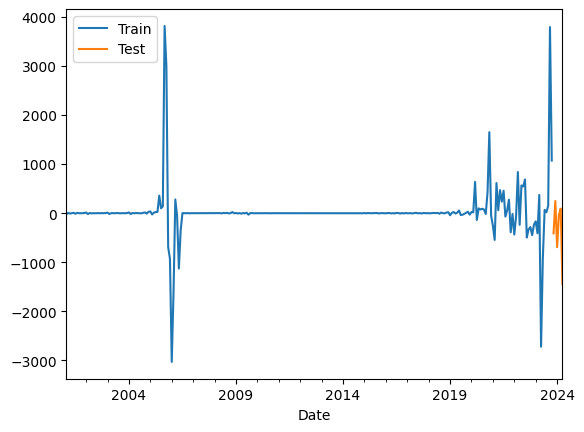

In [ ]:
#we want to predict 6 months
#Recall the time series was resampled Monthly
test_lags = 6
train, test = train_test_split(ts_theft, test_size= test_lags)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

### Manual SARIMA model/Forecasting

In [ ]:
#ARIMA orders for non-seasoning:
p=1 #non seasonal AR
d=1 #non seasonal differencing
q=2 #non seasonal MA

# Orders for seasonal components
P = 4  # Seasonal AR
D = 0  # Seasonal differencing
Q = 4  # Seasonal MA
m = 12 # Seasonal period
#Fitting a manual SARIMA model based on the orders determined during my exploration
sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                          
===================================================================================================
Dep. Variable:                                           y   No. Observations:                  273
Model:             ARIMA(1, 1, 2)x(4, 0, [1, 2, 3, 4], 12)   Log Likelihood               -2059.860
Date:                                     Tue, 07 May 2024   AIC                           4143.721
Time:                                             14:34:21   BIC                           4186.990
Sample:                                         02-28-2001   HQIC                          4161.092
                                              - 10-31-2023                                         
Covariance Type:                                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0904      0.082      1.107      0.268      -0.070       0.251
ma.L1         -0.6450      0.440     -1.466      0.143      -1.507       0.217
ma.L2         -0.3546      0.184     -1.930      0.054      -0.715       0.005
ar.S.L12      -0.0362      8.903     -0.004      0.997     -17.485      17.413
ar.S.L24       1.1318      5.298      0.214      0.831      -9.252      11.516
ar.S.L36       0.4486      5.872      0.076      0.939     -11.060      11.957
ar.S.L48      -0.5543      5.298     -0.105      0.917     -10.939       9.830
ma.S.L12       0.1639      9.699      0.017      0.987     -18.846      19.173
ma.S.L24      -1.0889      7.097     -0.153      0.878     -14.998      12.821
ma.S.L36      -0.5586      5.008     -0.112      0.911     -10.374       9.257
ma.S.L48       0.5138      5.923      0.087      0.931     -11.095      12.123
sigma2      2.569e+05      0.000   6.46e+08      0.000    2.57e+05    2.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15950.48
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             1.86
Prob(H) (two-sided):                  0.73   Kurtosis:                        40.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.88e+25. Standard errors may be unstable.
"""

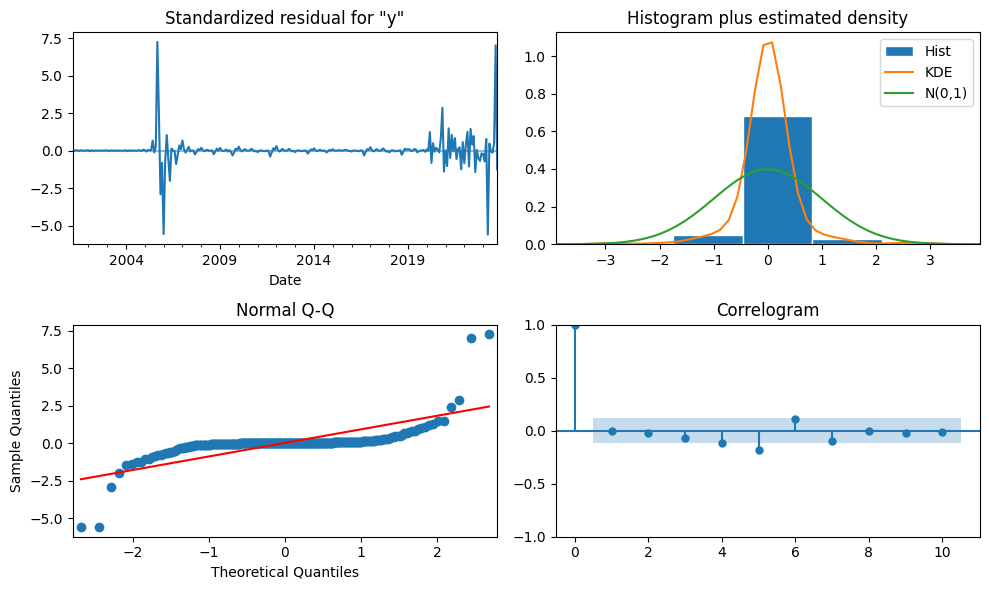

In [ ]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

- There are some significant values in the correlogram of the residuals indicating this model may have missed something.

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 389.112
- MSE = 278,515.225
- RMSE = 527.745
- R^2 = 0.149
- MAPE = 107.78%


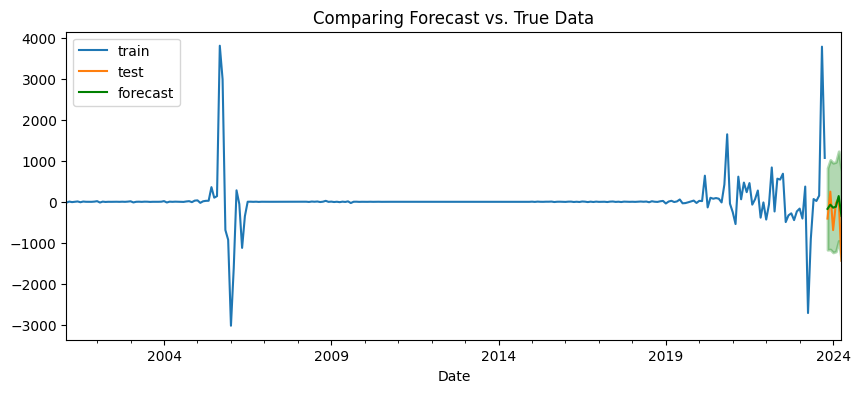

In [ ]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df_thief = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df_thief);
# Obtain metrics
regression_metrics_ts(test, forecast_df_thief['mean'])

### Tuning with pmdarima's auto_arima

In [ ]:
#Using the default auto_arima to choose the best model based on the AIC score.
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.09 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4178.248, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4142.470, Time=0.30 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4137.209, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4176.631, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4137.056, Time=0.07 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=4137.093, Time=0.17 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=4138.419, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=4138.740, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=4138.575, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4141.649, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=4128.109, Time=0.50 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=4126.638, Time=1.32 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=4127.562, Time=3.35 sec
 ARIMA(1,0,2)(1,0,1)[12]

In [ ]:
# Getting the best onseasonal and seasonal orders from the auto_arima
print(auto_model.order)
print(auto_model.seasonal_order)

(2, 0, 3)
(0, 0, 0, 12)


In [ ]:
#Fitting a model on training data with the best parameters from auto_arima:
#ARIMA orders for non-seasoning:
p=2 #non seasonal AR
d=0 #non seasonal differencing
q=3 #non seasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

In [ ]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  273
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -2049.881
Date:                Tue, 07 May 2024   AIC                           4111.762
Time:                        14:36:54   BIC                           4133.419
Sample:                    02-28-2001   HQIC                          4120.456
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1997      0.051     -3.952      0.000      -0.299      -0.101
ar.L2          0.7910      0.044     18.127      0.000       0.705       0.876
ma.L1          0.6168      0.060     10.252      0.000       0.499       0.735
ma.L2         -0.8745      0.037    -23.664      0.000      -0.947      -0.802
ma.L3         -0.5602      0.041    -13.766      0.000      -0.640      -0.480
sigma2      1.931e+05   4724.331     40.881      0.000    1.84e+05    2.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             16339.57
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             2.23
Prob(H) (two-sided):                  0.65   Kurtosis:                        40.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

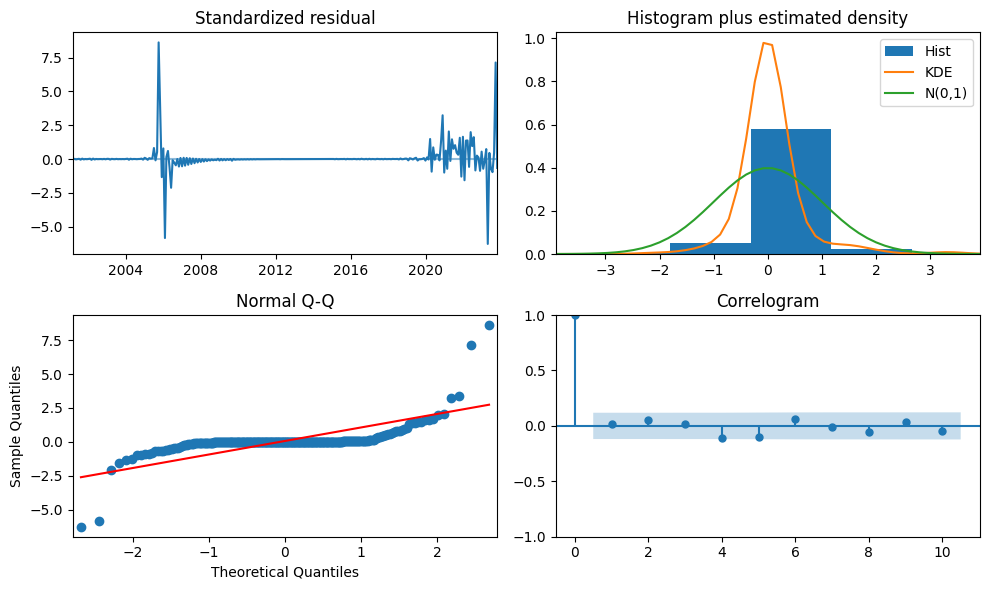

In [ ]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

- No more significant values in the correlogram of the residuals.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 564.302
- MSE = 438,864.073
- RMSE = 662.468
- R^2 = -0.341
- MAPE = 329.31%


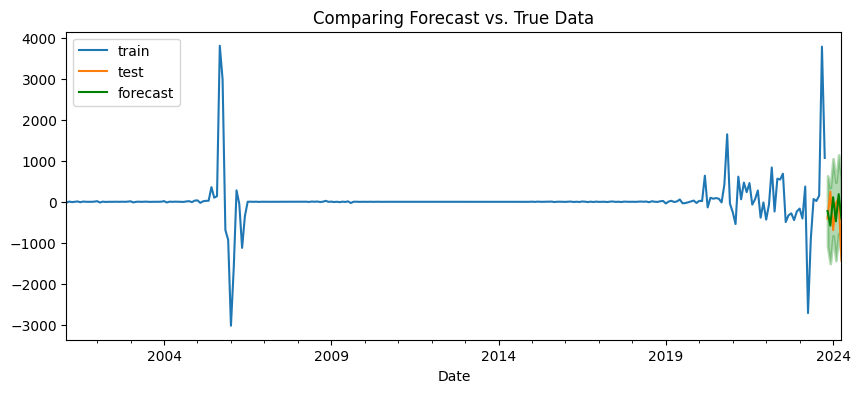

In [ ]:
#custom function to fit the best model using ARIMA.
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df_theft = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df_theft);
# Obtain metrics
regression_metrics_ts(test, forecast_df_theft['mean'])

### Final model Choice.

-  Select the final model and justify your choice. (Which metrics or diagnostics support your choice?)

In [ ]:
#Select your final model
#Comparing the results:

#Initial Manual SARIMA Model     Auto_Arima Model
#(1,1,2)(4,0,4)[12]              (2,0,3)(0,0,0)[12]
-------------------           ---------------------
Regression Metrics:           Regression Metrics:
-------------------           ----------------------
- MAE = 389.112             - MAE = 564.302
- MSE = 278,515.225       - MSE = 438,864.073
- RMSE = 527.745          - RMSE = 662.468
- R^2 = 0.149               - R^2 = -0.341
- MAPE = 107.78%              - MAPE = 329.31%

- AIC = 4143.721              - AIC = 4111.762
-BIC  = 4186.990               - BIC = 4133.419

- The Initial Manual SARIMA model performed a better on most of the metrics when compared to the Auto_Arima model, even though the Initial Manual SARIMA model had a slightly higher AIC & BIC.
- However, also the training set lies within the green confidence level interval with no outliers.
- Therefore my final model choice is the Initial Manual SARIMA model(1,1,2)(4,0,4)[12].

## Transforming Data_Battery

In [ ]:
#Filtering only 2 crimes: Theft and battery
ts_battery = df_dt[(df_dt['Primary Type'] == 'BATTERY')]

In [ ]:
#Transform the data to obtain a time series of the crime count per month using .size().
ts_battery=ts_battery.resample('M').size()

In [ ]:
#Checking for null values
ts_battery.isna().sum()

0

### Differencing/Stationarity/ACF_PACF Plots

In [ ]:
#Determine if nonseasonal and/or seasonal differencing is required
# check for nonseasonal differencing
ndiffs(ts_battery)

1

In [ ]:
# Checking for seasonal differencing
#Since it's monthly data, each season has m=12.
nsdiffs(ts_battery, m = 12)

0

In [ ]:
#Checking the Timeseries for stationarity
get_adfuller_results(ts_battery)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-2.278684,7,272,0.178935,0.05,False


- This time series isn't stationary, therefore we shall apply differencing once inorder to make it stationary.

In [ ]:
#Differencing
ts_battery=ts_battery.diff().dropna()

In [ ]:
#Checking the Timeseries for stationarity again
get_adfuller_results(ts_battery)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-8.269974,6,272,0.0,0.05,True


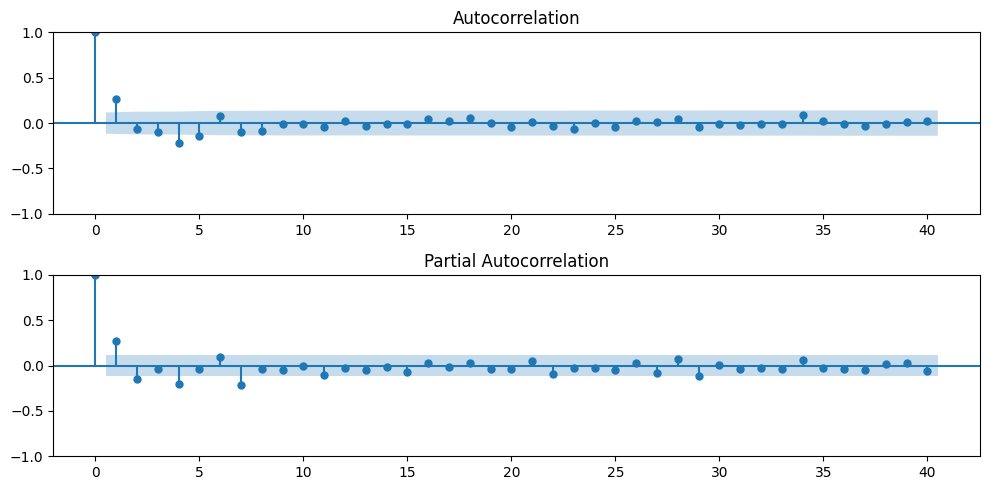

In [ ]:
# Using the plot_acf_pacf function:
plot_acf_pacf(ts_battery);

- The acf_plot showcases that the ACF graph has a gradual decrease after the 1st lag hence p=1, the PACF also shows a gradual drop after the 2nd lag,q=2.
- ACF shows 4 significant peaks at seasonal lags. Let's use the seasonal order Q=4.
- PACF shows 4 significant peaks at seasonal lags. Let's use the seasonal order P=4.

## Train Test Split

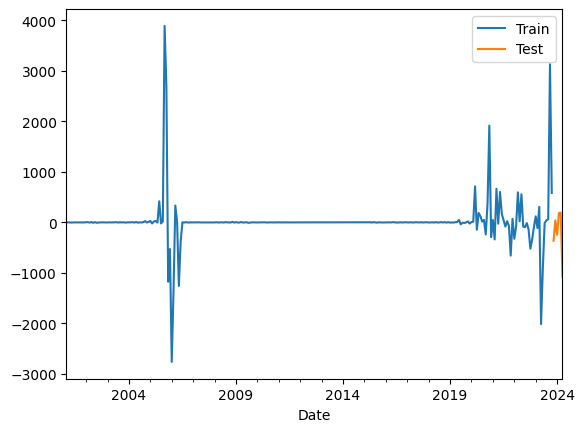

In [ ]:
#we want to predict 6 months
#Recall the time series was resampled Monthly
test_lags = 6
train, test = train_test_split(ts_battery, test_size= test_lags)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [ ]:
#Using the default auto_arima to choose the best model based on the AIC score.
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4126.277, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4107.465, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4103.228, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4124.531, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4101.292, Time=0.06 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=4103.155, Time=0.37 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=4105.139, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=4103.070, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=4102.921, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4105.478, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=4090.748, Time=0.56 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=4092.355, Time=1.13 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=4092.386, Time=2.42 sec
 ARIMA(1,0,2)(1,0,1)[12]

In [ ]:
#ARIMA orders for non-seasoning:
p=2 #non seasonal AR
d=0 #non seasonal differencing
q=1 #non seasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 387.726
- MSE = 234,009.862
- RMSE = 483.746
- R^2 = -0.217
- MAPE = 191.22%


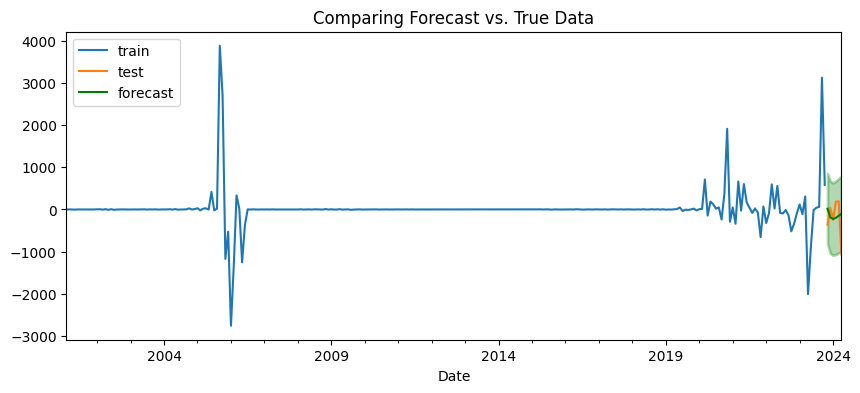

In [ ]:
#custom function to fit the best model using ARIMA.
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df_battery = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df_battery);
# Obtain metrics
regression_metrics_ts(test, forecast_df_battery['mean'])

## True Forecasts using the entire dataset
- For dates beyond the entire ts.

In [ ]:
#Transform the data to obtain a time series of the crime count per month using .size()
#For all crimes
ts_new=df_dt.resample('M').size()

In [ ]:
ts_new

Date
2001-01-31       59
2001-02-28       20
2001-03-31       37
2001-04-30       20
2001-05-31       19
              ...  
2023-12-31    21154
2024-01-31    19285
2024-02-29    19615
2024-03-31    20432
2024-04-30    13543
Freq: M, Length: 280, dtype: int64

In [ ]:
ts_new.index

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=280, freq='M')

In [ ]:
#Checking for null values
ts_new.isna().sum()

0

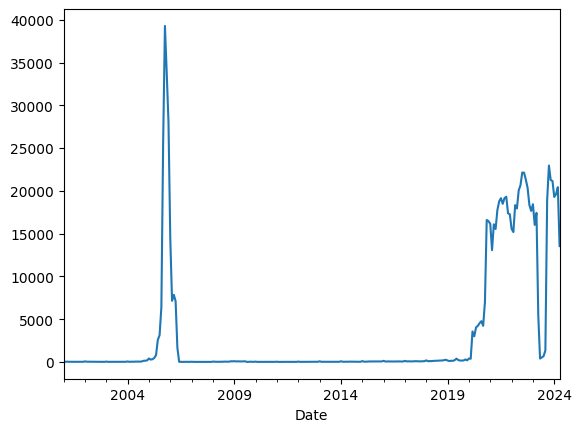

In [ ]:
# Visualize the time series
ts_new.plot();

In [ ]:
# check for nonseasonal differencing
ndiffs(ts_new)

1

In [ ]:
# Check for seasonal differcing
#  m=12 depicting 12months in a year.
nsdiffs(ts_new,m= 12)

0

In [ ]:
#Differencing once to make the time series data stationary
ts_new=ts_new.diff().dropna()

In [ ]:
#Checking the differeced Timeseries for stationarity
get_adfuller_results(ts_new)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-8.857932,6,272,0.0,0.05,True


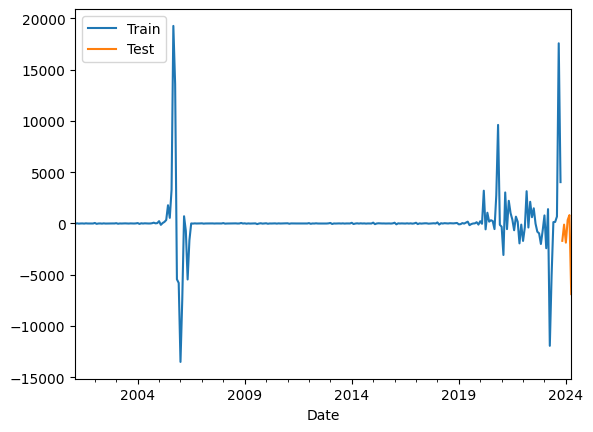

In [ ]:
#we want to predict 6 months
#Recall the time series was resampled Monthly
test_lags = 6
train, test = train_test_split(ts_new, test_size= test_lags)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [ ]:
#Using the default auto_arima to choose the best model based on the AIC score.
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5028.413, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4987.915, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4984.753, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5026.746, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4983.287, Time=0.11 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=4984.658, Time=0.28 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=4985.857, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=4984.041, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=4984.334, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4986.200, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=4974.950, Time=0.94 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=4976.038, Time=0.93 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=4975.730, Time=1.35 sec
 ARIMA(1,0,2)(1,0,1)[12]

In [ ]:
#Fitting the tuned ARIMA model on training data with the best parameters from auto_arima:
#ARIMA orders for non-seasoning:
p=2 #non seasonal AR
d=0 #non seasonal differencing
q=3 #non seasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 2,142.726
- MSE = 7,198,051.424
- RMSE = 2,682.918
- R^2 = -0.084
- MAPE = 524.24%


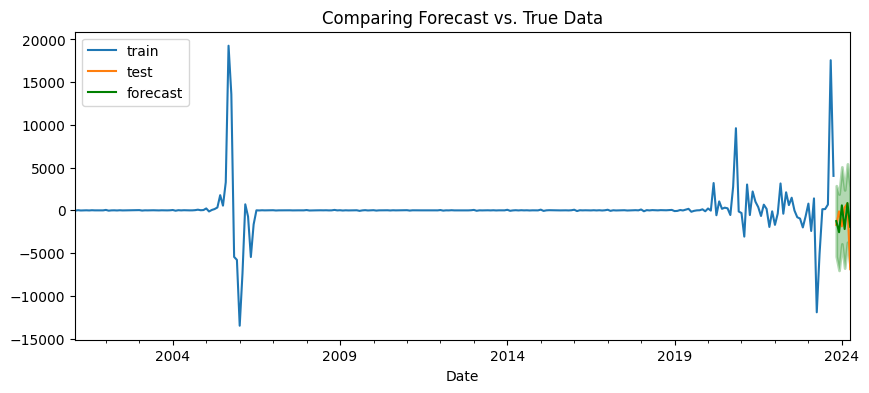

In [ ]:
#custom function to fit the best model using ARIMA.
# Use auto_arima parameters to fit an ARIMA
auto_model2 = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df2 = auto_model2.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df2);
# Obtain metrics
regression_metrics_ts(test, forecast_df2['mean'])

- For each of your two selected crimes, answer the following questions in a markdown cell:
    - Calculate the predicted net change in the number (raw counts) of this type of crime from the beginning of the forecast to the end.
    - Convert the raw delta into a percent change.

In [ ]:
#Theft
#Raw values for change in the final month in the forecast vs. the first month.
final_month_forecast_theft = forecast_df_theft.iloc[-1] ['mean'] # Forecasted value for the final month
first_month_forecast_theft = forecast_df_theft.iloc[0]['mean'] # Forecasted value for the first month

# Net change in theft crime count
net_change_theft = final_month_forecast_theft - first_month_forecast_theft

# Print the results
print(f"The predicted net change in the number(raw counts)of the theft crime from the beginning of the forecast to the end: {net_change_theft:.2f}")
print(f"The raw delta percent change for theft: {(net_change_theft/final_month_forecast_theft)*100:.2f}%")

#Battery
#Raw values for change in the final month in the forecast vs. the first month.
final_month_forecast_battery = forecast_df_battery.iloc[-1] ['mean'] # Forecasted value for the final month
first_month_forecast_battery = forecast_df_battery.iloc[0]['mean'] # Forecasted value for the first month

#Net change in battery crime count
net_change_battery = final_month_forecast_battery - first_month_forecast_battery

# Print the results
print(f"The predicted net change in the number(raw counts)of the battery crime from the beginning of the forecast to the end: {net_change_battery:.2f}")
print(f"The raw delta percent change for battery: {(net_change_battery/final_month_forecast_battery)*100:.2f}%")

The predicted net change in the number(raw counts)of the theft crime from the beginning of the forecast to the end: -187.47
The raw delta percent change for theft: 45.48%
The predicted net change in the number(raw counts)of the battery crime from the beginning of the forecast to the end: -121.19
The raw delta percent change for battery: 116.43%


### Final Evaluation:

- After completing both models and getting the forecasts for both crimes for 6 months into the future (beyond the data), answer the following questions in a Markdown cell:

    - Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?
    - Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?
    - Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?

In [ ]:
#Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?
if final_month_forecast_theft > final_month_forecast_battery:
    print("Of the two crimes, between battery & theft, theft seems to be having the highest monthly count of crimes at the end of the forecast.")
elif final_month_forecast_battery > final_month_forecast_theft:
    print("Of the two crimes, between battery & theft, battery seems to be having the highest monthly count of crimes at the end of the forecast.")
else:
    print("Both values are equal.")

Of the two crimes, between battery & theft, battery seems to be having the highest monthly count of crimes at the end of the forecast.


In [ ]:
#Of the two crimes, which is forecasted to have the highest net change at the end of the forecast?
if net_change_theft > net_change_battery:
    print("Of the two crimes between battery & theft, battery seems to be having the highest net change at the end of the forecast.")
elif net_change_battery > net_change_theft:
    print("Of the two crimes between battery & theft, battery seems to be having the highest net change at the end of the forecast.")
else:
    print("Both values are equal.")

Of the two crimes between battery & theft, battery seems to be having the highest net change at the end of the forecast.


In [ ]:
#Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?
#The raw delta percent change for battery
raw_delta_percent_battery=net_change_battery/final_month_forecast_battery
raw_delta_percent_theft=net_change_theft/final_month_forecast_theft

if raw_delta_percent_theft > raw_delta_percent_battery:
    print("Of the two crimes,between battery and theft, theft has the highest percent change by the end of the forecast.")
elif raw_delta_percent_battery > raw_delta_percent_theft:
    print("Of the two crimes,between battery and theft, battery has the highest percent change by the end of the forecast.")
else:
    print("Both values are equal.")

Of the two crimes,between battery and theft, battery has the highest percent change by the end of the forecast.


### Final Recommendations
- My analysis shows that the battery crime count is predominant than when I made a comparison with theft crime. Therefore it's on that note that I would highly put across the following recommendations:
  - The key stakeholders need to increase police patrols in battery hotspot areas. However, this has to be done systematically so as to allocate these resources efficiently. A bar plot could show the districts where battery crime is most predominant.
 - I would also recommend increasing and improving lighting around dark streets and alleys. Additionally also install CCTV cameras in those battery crime prone areas so as to deter such criminal activity.
 - Crime never stops. Therefore I would also recommend that we need to routinely monitor and analyze crime data to identify any emerging trends so as to come up with innovative and effective strategies to curb crime.

In [ ]:
#A heat map showing the distribution of battery crimes across different districts.
ts_battery_plot = df_dt[(df_dt['Primary Type'] == 'BATTERY')]

In [ ]:
ts_battery_plot=ts_battery_plot[['MonthName','District','Primary Type']]

In [ ]:
ts_battery_plot['crime count'] = ts_battery_plot.groupby(['MonthName', 'District'])['Primary Type'].transform('count')

In [ ]:
ts_battery_plot

,MonthName,District,Primary Type,crime count
Date,,,,
2020-04-16 05:00:00,April,9.0,BATTERY,597
2020-09-27 23:29:00,September,7.0,BATTERY,1046
2005-07-10 15:00:00,July,7.0,BATTERY,526
2001-09-15 02:00:00,September,12.0,BATTERY,702
2020-09-11 22:44:00,September,11.0,BATTERY,1105
...,...,...,...,...
2006-01-30 15:35:00,January,22.0,BATTERY,436
2006-02-22 15:00:00,February,4.0,BATTERY,816
2006-02-27 10:00:00,February,9.0,BATTERY,637


<ipython-input-169-96ab747d0b37>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(ts_battery_plot, x='District',y='crime count',palette='dark')
<ipython-input-169-96ab747d0b37>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


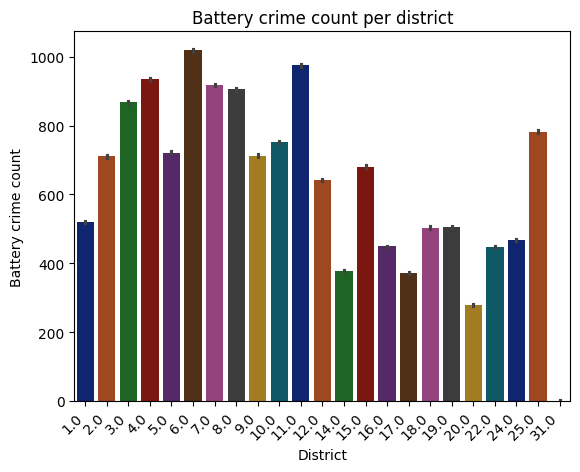

In [169]:
# Assuming your DataFrame is named 'crime_data'
import seaborn as sns
ax=sns.barplot(ts_battery_plot, x='District',y='crime count',palette='dark')
ax.set_xlabel('District')
ax.set_ylabel('Battery crime count')
ax.set_title('Battery crime count per district')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- From this barplot visualization, we can pick out the Top 5 disticts that I would recommend the stakeholders should start with inorder to address battery crime as per the recommendations mentioned above. These include:
    - District 6.0
    - District 11.0
    - District 4.0
    - District 7.0
    - District 8.0

*NOTE*
- If some of the above recommendations are executed, it's worth also performing more data analysis and visualizing a before-and-after, so as to show the extent to which crime has reduced and also show the effective-use of state resources like street-lighting,CCTV cameras,police patrols etc in curbing crime.